In [1]:
from pykitPIV.ml import PIVEnv
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <6A7076EE-85BD-37A7-BC35-1D4867F2B3D3> /Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <A84DFEFF-287E-3B94-A7DB-731FA5F9CBBC> /Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-02-04 15:19:50.992431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow 

In [2]:
env = PIVEnv(interrogation_window_size=(100,200),
             interrogation_window_size_buffer=10,
             particle_spec={'diameters': (1, 1),
                            'distances': (2, 2),
                            'densities': (0.2, 0.2),
                            'diameter_std': 1,
                            'seeding_mode': 'random'},
             flowfield_size=(500,1000), 
             flowfield_spec={'gaussian_filters': (30,30),
                             'n_gaussian_filter_iter': 5,
                             'displacement': (2,2)},
             motion_spec={'n_steps': 10,
                          'time_separation': 5,
                          'particle_loss': (0, 2),
                          'particle_gain': (0, 2)},
             image_spec={'exposures': (0.5, 0.9),
                         'maximum_intensity': 2**16-1,
                         'laser_beam_thickness': 1,
                         'laser_over_exposure': 1,
                         'laser_beam_shape': 0.95,
                         'alpha': 1/8,
                         'clip_intensities': True,
                         'normalize_intensities': False},
             user_flowfield=None,
             random_seed=100)

In [3]:
env.observation_space.sample()

array([123, 155])

In [4]:
sample_observation = env.observation_space.sample()

In [5]:
sample_observation

array([191, 463])

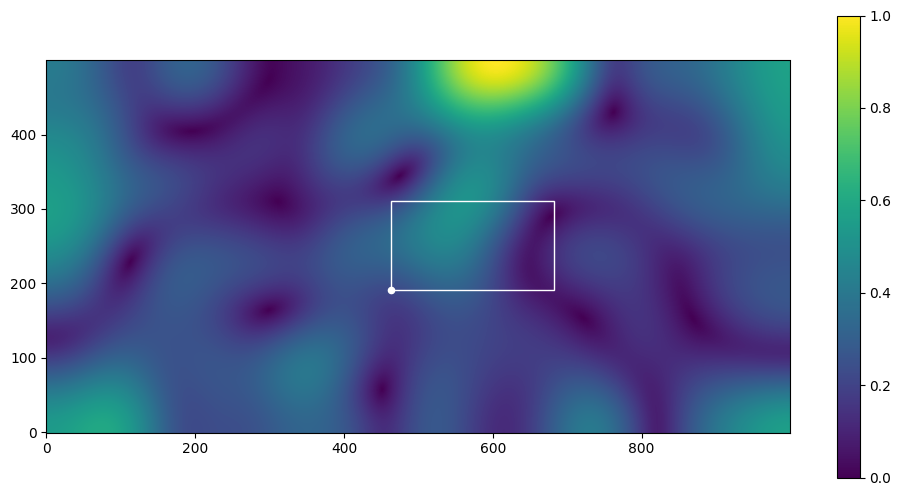

In [6]:
env.render(sample_observation,
           c='white',
           s=20,
           lw=1,
           figsize=(12,6))

In [7]:
image_obj = env.record_particles(sample_observation)

(1, 2, 120, 220)
(100, 200)
10
Image 1:	42 particles lost
Particles added to the image.
Velocity field added to the image.
Particle movement added to the image.
Reflected light added to images I1.
Reflected light added to images I2.


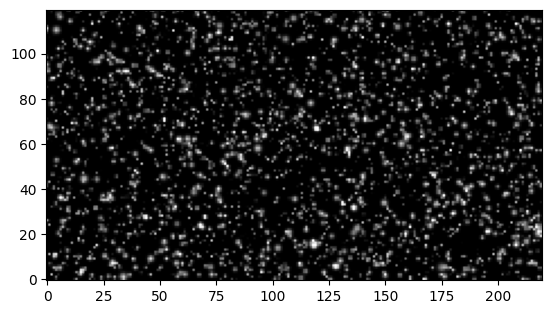

In [8]:
plt.imshow(image_obj.images_I1[0,0,:,:], cmap='Greys_r', origin='lower')

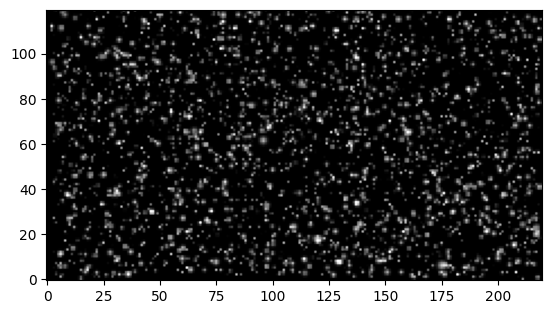

In [9]:
plt.imshow(image_obj.images_I2[0,0,:,:], cmap='Greys_r', origin='lower')

<module 'matplotlib.pyplot' from '/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/matplotlib/pyplot.py'>

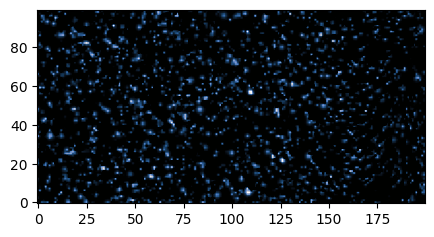

In [10]:
image_obj.plot_image_pair(0, cmap=cmc.oslo)

<module 'matplotlib.pyplot' from '/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/matplotlib/pyplot.py'>

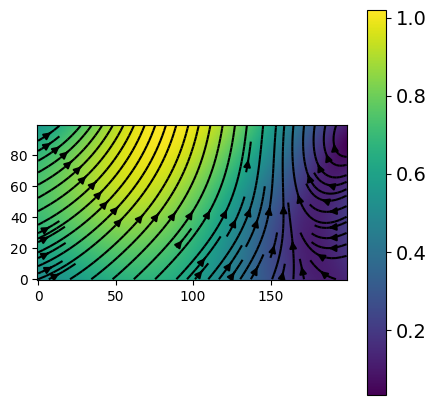

In [11]:
image_obj.plot_field_magnitude(0, 
                               add_streamplot=True,
                               streamplot_density=1,
                               streamplot_color='k',)

MovieWriter ffmpeg unavailable; using Pillow instead.


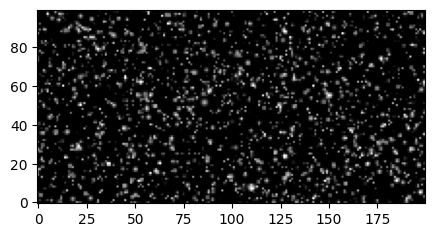

In [12]:
image_obj.animate_image_pair(0, filename='image.gif')

***